In [4]:
import torch

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
%matplotlib inline
%config InlineBackend.figure_format='retina'

%load_ext autoreload
%autoreload 2

from model import Generator
from dataset import inverse_normalize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
NOISE_DIM = 100

G = Generator(noise_dim=NOISE_DIM, input_chanels=3).to(device)

state_dict = torch.load(f='weights/g_model_epoch_49.pt', map_location=torch.device(device))
G.load_state_dict(state_dict=state_dict)
G.eval()

Generator(
  (upsample_layer1): Sequential(
    (0): ConvTranspose2d(100, 1024, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (upsample_layer2): Sequential(
    (0): ConvTranspose2d(1024, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (upsample_layer3): Sequential(
    (0): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (upsample_layer4): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (upsample_layer5): Sequential(
    (

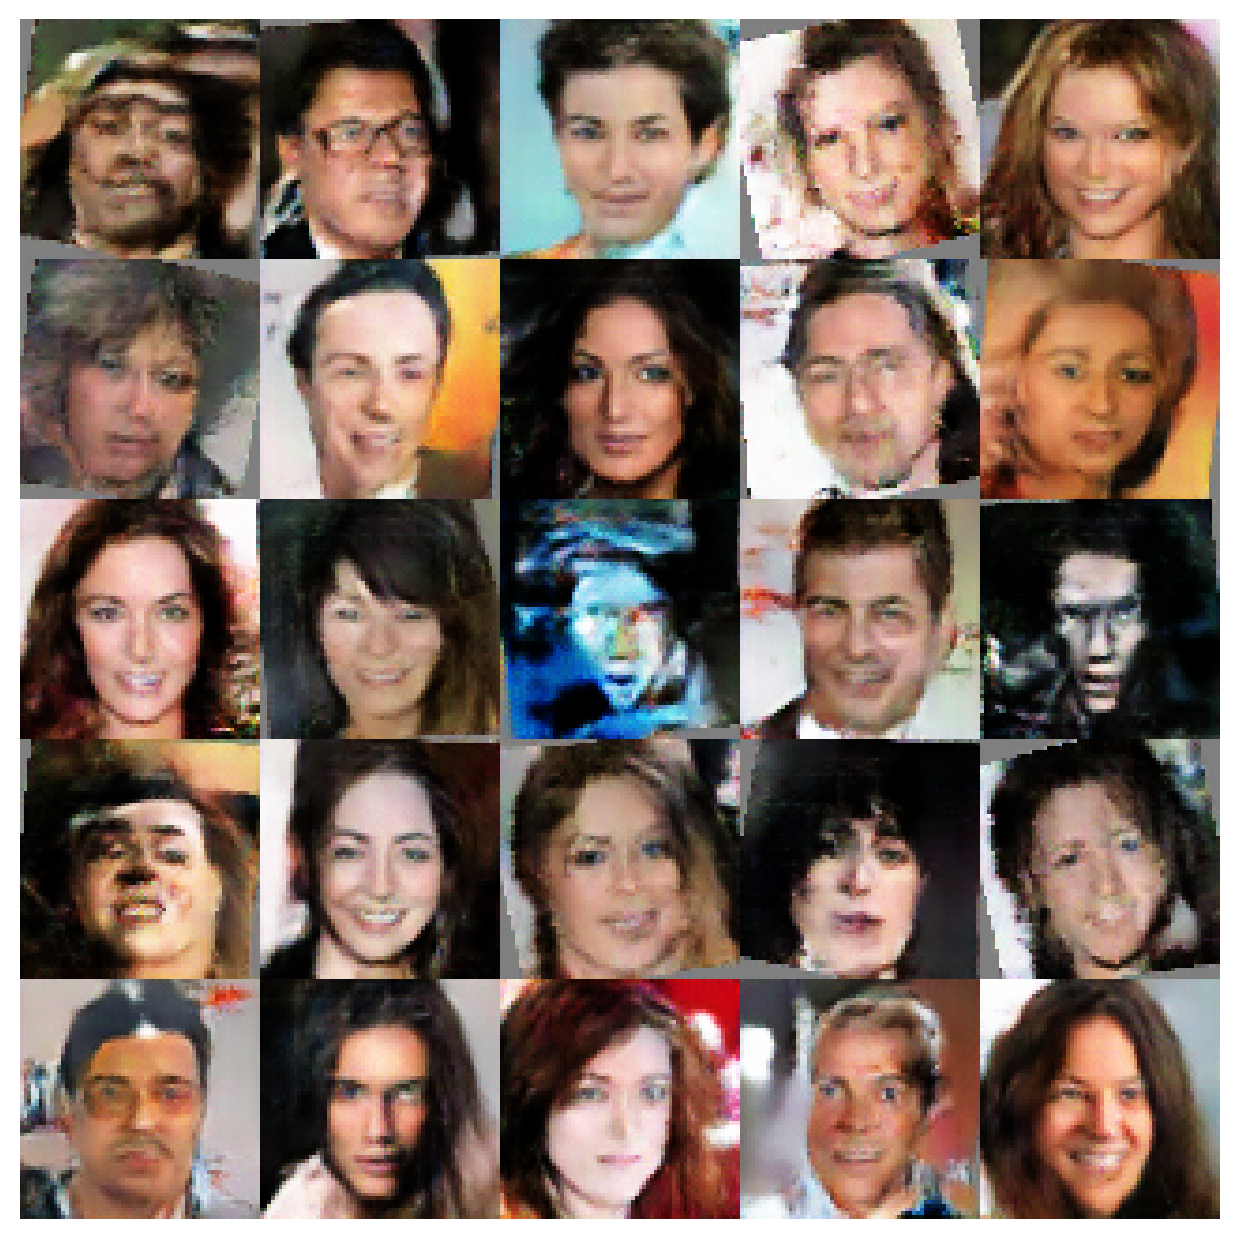

In [12]:
noise = torch.randn(25, NOISE_DIM, 1, 1).to(device)
fake_imgs = G(noise).detach().cpu()

fig, axs = plt.subplots(5, 5, figsize=(6,6))
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
axs = axs.flatten()
for i in range(25):
    axs[i].imshow(inverse_normalize(fake_imgs[i]).permute(1,2,0))
    axs[i].axis('off')
plt.show()